In [118]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [119]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[9]
Data_test = path2+open_folder1[8]
print(open_folder1)
print(Data_test)

['.ipynb_checkpoints', '2014', '2015', '2016', '2017', '2018', 'All_years', 'Data_API.ipynb', 'Data_Test_Foot.csv', 'Data_Train_Foot.csv', 'Points_Equipe_Hist', 'Points_Equipe_Hist_VF', 'Recup_Data_Historical.ipynb', 'Teams_puiss.csv', 'Web_Score.ipynb']
C:\Users\Amrta\Documents\GitHub\projetannuel4IABD2\ETAPE_3\Scripts_Recup_Data\Projet_Annuel_Data\Data_Test_Foot.csv


In [120]:
train_csv = pd.read_csv(Data_train,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,date,homeTeam,awayTeam,score,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154
1,1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054
2,2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815
3,3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045
4,4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11426,375,2019-05-18,Levante,Ath Madrid,0.0,2.0,2.0,2.0,0.0,2.0,...,1.139073,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169
11427,376,2019-05-18,Sevilla,Ath Bilbao,1.0,2.0,0.0,1.0,0.0,1.0,...,1.625551,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881
11428,377,2019-05-18,Valladolid,Valencia,2.0,0.0,2.0,0.0,1.0,1.0,...,0.864865,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990
11429,378,2019-05-19,Eibar,Barcelona,0.0,2.0,2.0,2.0,2.0,4.0,...,1.246696,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917


In [121]:
train_columns={'win_cons_home':train_csv.win_cons_home,'win_cons_away':train_csv.win_cons_away,'lose_cons_home':train_csv.lose_cons_home,'lose_cons_away':train_csv.lose_cons_away,'puissance_HomeTeam':train_csv.puissance_HomeTeam,'puissance_AwayTeam':train_csv.puissance_AwayTeam}
df = pd.DataFrame(train_columns)
X = df.values
X

array([[    0,     0,     0,     0,  2409,  6154],
       [    0,     0,     0,     0,  4008,  3054],
       [    0,     0,     0,     0,  3029,  4815],
       ...,
       [    2,     2,     0,     0,  4109, 12990],
       [    0,     1,     1,     0,  4455, 15917],
       [    0,     1,     1,     0, 11475,   100]], dtype=int64)

In [122]:
Y = train_csv['score'].values
Y[0]

2.0

In [123]:
x_train, x_validation, y_train, y_validation =train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)
y_train = y_train.astype(int)
y_validation = y_validation.astype(int)

(9144, 6) (9144,)


In [124]:
# for row in y_train:
#      print(row)

In [125]:
x_train

array([[    0,     0,     1,     1,  2640,  5236],
       [    0,     3,     0,     0,   100,  6089],
       [    0,     1,     1,     0,  6273, 13105],
       ...,
       [    0,     2,     2,     0,   100,  2236],
       [    0,     0,     2,     3,  3010,   100],
       [    0,     1,     0,     0,  3465, 13105]], dtype=int64)

In [126]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(5, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [127]:
model = create_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 512)               3584      
_________________________________________________________________
dense_68 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_69 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_70 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_71 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_72 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_73 (Dense)             (None, 512)              

In [128]:
save = ModelCheckpoint('model_CNN.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [129]:
history = model.fit(x_train, y_train,validation_data=(x_validation,y_validation),batch_size=90,epochs=100,callbacks = [save])

Train on 9144 samples, validate on 2287 samples
Epoch 1/100
8730/9144 [===========================>..] - ETA: 0s - loss: 13.7861 - accuracy: 0.4168
Epoch 00001: val_accuracy improved from -inf to 0.52864, saving model to model_CNN.h5
9144/9144 [==============================] - 1s 162us/sample - loss: 13.2633 - accuracy: 0.4162 - val_loss: 1.9431 - val_accuracy: 0.5286
Epoch 2/100
8820/9144 [===========================>..] - ETA: 0s - loss: 1.3993 - accuracy: 0.4676
Epoch 00002: val_accuracy did not improve from 0.52864
9144/9144 [==============================] - 1s 88us/sample - loss: 1.3924 - accuracy: 0.4672 - val_loss: 1.1350 - val_accuracy: 0.4692
Epoch 3/100
9090/9144 [============================>.] - ETA: 0s - loss: 1.1113 - accuracy: 0.4922
Epoch 00003: val_accuracy did not improve from 0.52864
9144/9144 [==============================] - 1s 93us/sample - loss: 1.1104 - accuracy: 0.4925 - val_loss: 1.0839 - val_accuracy: 0.5208
Epoch 4/100
8640/9144 [=========================

Epoch 29/100
9000/9144 [============================>.] - ETA: 0s - loss: 0.9783 - accuracy: 0.5337
Epoch 00029: val_accuracy did not improve from 0.54220
9144/9144 [==============================] - 1s 86us/sample - loss: 0.9789 - accuracy: 0.5334 - val_loss: 0.9721 - val_accuracy: 0.5378
Epoch 30/100
8910/9144 [============================>.] - ETA: 0s - loss: 0.9817 - accuracy: 0.5305
Epoch 00030: val_accuracy did not improve from 0.54220
9144/9144 [==============================] - 1s 86us/sample - loss: 0.9814 - accuracy: 0.5315 - val_loss: 0.9823 - val_accuracy: 0.5352
Epoch 31/100
8730/9144 [===========================>..] - ETA: 0s - loss: 0.9825 - accuracy: 0.5308
Epoch 00031: val_accuracy did not improve from 0.54220
9144/9144 [==============================] - 1s 89us/sample - loss: 0.9827 - accuracy: 0.5307 - val_loss: 0.9745 - val_accuracy: 0.5369
Epoch 32/100
8640/9144 [===========================>..] - ETA: 0s - loss: 0.9807 - accuracy: 0.5310
Epoch 00032: val_accuracy d

8640/9144 [===========================>..] - ETA: 0s - loss: 0.9868 - accuracy: 0.5307
Epoch 00057: val_accuracy did not improve from 0.54263
9144/9144 [==============================] - 1s 89us/sample - loss: 0.9872 - accuracy: 0.5285 - val_loss: 0.9699 - val_accuracy: 0.5374
Epoch 58/100
8910/9144 [============================>.] - ETA: 0s - loss: 0.9808 - accuracy: 0.5288
Epoch 00058: val_accuracy did not improve from 0.54263
9144/9144 [==============================] - 1s 87us/sample - loss: 0.9814 - accuracy: 0.5296 - val_loss: 0.9653 - val_accuracy: 0.5396
Epoch 59/100
9000/9144 [============================>.] - ETA: 0s - loss: 0.9798 - accuracy: 0.5320
Epoch 00059: val_accuracy did not improve from 0.54263
9144/9144 [==============================] - 1s 87us/sample - loss: 0.9809 - accuracy: 0.5318 - val_loss: 0.9776 - val_accuracy: 0.5413
Epoch 60/100
8910/9144 [============================>.] - ETA: 0s - loss: 0.9786 - accuracy: 0.5328
Epoch 00060: val_accuracy did not improv

Epoch 85/100
8910/9144 [============================>.] - ETA: 0s - loss: 0.9851 - accuracy: 0.5255
Epoch 00085: val_accuracy did not improve from 0.54482
9144/9144 [==============================] - 1s 98us/sample - loss: 0.9850 - accuracy: 0.5255 - val_loss: 0.9706 - val_accuracy: 0.5234
Epoch 86/100
9090/9144 [============================>.] - ETA: 0s - loss: 0.9807 - accuracy: 0.5286
Epoch 00086: val_accuracy did not improve from 0.54482
9144/9144 [==============================] - 1s 96us/sample - loss: 0.9805 - accuracy: 0.5290 - val_loss: 0.9748 - val_accuracy: 0.5326
Epoch 87/100
8730/9144 [===========================>..] - ETA: 0s - loss: 0.9795 - accuracy: 0.5306
Epoch 00087: val_accuracy did not improve from 0.54482
9144/9144 [==============================] - 1s 98us/sample - loss: 0.9794 - accuracy: 0.5299 - val_loss: 0.9683 - val_accuracy: 0.5291
Epoch 88/100
9090/9144 [============================>.] - ETA: 0s - loss: 0.9802 - accuracy: 0.5271
Epoch 00088: val_accuracy d

Text(0, 0.5, 'Accuracy')

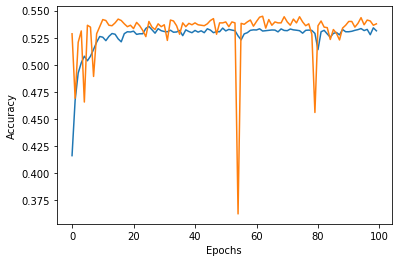

In [130]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [131]:
test_csv=  pd.read_csv(Data_test,sep=";",encoding="utf-8")
display(test_csv)

,Unnamed: 0,id_match,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,NbgoalsHalfTime,NbgoalsFullTime
0,1821,274274,2019-11-10,810,503,Boavista FC,FC Porto,2.0,0,1,...,0.900000,2.000000,0.400000,0.916667,0.500000,0.666667,0.333333,0.333333,1,1
1,1822,274281,2019-11-29,5530,810,CD Santa Clara,Boavista FC,2.0,0,2,...,0.636364,0.818182,0.363636,0.363636,0.909091,0.636364,0.545455,0.454545,2,3
2,1823,274278,2019-11-30,583,5544,Moreirense FC,CD Aves,1.0,2,1,...,1.181818,1.090909,0.454545,0.818182,1.363636,2.363636,0.363636,1.090909,3,5
3,1824,274279,2019-11-30,1903,5575,Sport Lisboa e Benfica,CS Marítimo,1.0,3,0,...,2.000000,1.090909,0.562500,0.363636,1.363636,1.545455,0.454545,0.636364,3,4
4,1825,274282,2019-11-30,5601,5531,Portimonense SC,FC Famalicão,1.0,1,0,...,0.727273,2.090909,0.545455,0.545455,1.454545,1.454545,0.727273,0.363636,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1987,274441,2020-07-04,1903,810,Sport Lisboa e Benfica,Boavista FC,1.0,3,0,...,1.971429,0.827586,0.628571,0.482759,1.172414,1.000000,0.448276,0.448276,3,4
167,1988,274438,2020-07-04,5613,5544,Sporting Clube de Braga,CD Aves,1.0,0,0,...,1.689655,0.793103,0.827586,0.482759,1.241379,1.896552,0.517241,0.793103,0,4
168,1989,274439,2020-07-05,5533,496,Gil Vicente FC,Rio Ave FC,1.0,1,0,...,1.068966,1.448276,0.413793,0.758621,1.275862,1.103448,0.689655,0.551724,1,1
169,1990,274445,2020-07-05,1049,5531,CD Tondela,FC Famalicão,2.0,0,0,...,0.827586,1.517241,0.413793,0.482759,1.241379,1.517241,0.758621,0.482759,0,1


In [132]:
test_columns={'win_cons_home':test_csv.win_cons_home,'win_cons_away':test_csv.win_cons_away,'lose_cons_home':test_csv.lose_cons_home,'lose_cons_away':test_csv.lose_cons_away,'puissance_HomeTeam':test_csv.puissance_HomeTeam,'puissance_AwayTeam':test_csv.puissance_AwayTeam}
df = pd.DataFrame(test_columns)
x_test = df.values
x_test

array([[   0,    1,    1,    0, 2325, 6206],
       [   0,    0,    1,    2, 3175, 2325],
       [   0,    0,    0,    9, 1842, 1159],
       ...,
       [   0,    2,    1,    0, 1346,  100],
       [   0,    0,    0,    1, 1729, 2300],
       [   2,    0,    0,    0, 6206, 1589]], dtype=int64)

In [133]:
y_test = test_csv['score'].values
y_test[58]

2.0

In [134]:
print(test_csv.shape)
print(train_csv.shape)

(171, 38)
(11431, 25)


In [135]:
predictions = model.predict((x_test, y_test))

In [136]:
print(x_test[1])
print(y_test[1])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[1])
np.argmax(predictions[1])

[   0    0    1    2 3175 2325]
2.0
[2.7366942e-01 4.9328583e-01 2.3301458e-01 4.5245685e-07 2.9592418e-05]


1

# Prédiction Unique

In [137]:
unique = test_csv.values
results = []
equal = []
victory = []
loss = []
i = 0
unique.shape
cpt = 0

In [138]:
for i in unique:
    puissance_homeTeam = i[26]
    puissance_awayTeam = i[27]
    win_cons_home = i[14]
    win_cons_away = i[15]
    lose_cons_home = i[16]
    lose_cons_away= i[17]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    egalite = predictions1[0][0]*100
    victoire = predictions1[0][1]*100
    perte = predictions1[0][2]*100
    result = np.argmax(predictions1)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)
    print(result,egalite,victoire,perte,puissance_homeTeam,puissance_awayTeam,cpt)
    cpt = cpt+1

2 24.126499891281128 25.915998220443726 49.9535858631134 2325 6206 0
1 27.366939187049866 49.32858943939209 23.30145537853241 3175 2325 1
1 27.421411871910095 49.24194812774658 23.33369255065918 1842 1159 2
1 16.260305047035217 74.73894357681274 9.0005561709404 6562 1672 3
1 28.065842390060425 38.66302967071533 33.26670527458191 1067 2300 4
1 29.913508892059326 43.07937026023865 27.00607478618622 1729 1589 5
1 30.255326628684998 42.3364132642746 27.407488226890564 3593 3593 6
2 23.678666353225708 24.679166078567505 51.639050245285034 1346 5314 7
1 19.819913804531097 66.33564233779907 13.843131065368652 5314 100 8
1 16.050001978874207 75.18879175186157 8.76103788614273 6206 1215 9
2 23.629452288150787 24.54175353050232 51.825761795043945 2325 6562 10
1 27.834656834602356 37.954145669937134 34.206193685531616 1672 3175 11
1 28.66659164428711 47.5981742143631 23.733456432819366 2300 1729 12
2 23.32661598920822 23.719851672649384 52.95097231864929 1159 5314 13
2 26.173943281173706 31.56483

2 27.11900770664215 35.134777426719666 37.73963451385498 1672 3593 120
1 16.383786499500275 74.47271347045898 9.143295884132385 6562 1729 121
1 28.024503588676453 38.54161202907562 33.42936038970947 3593 5314 122
2 27.219882607460022 35.51520109176636 37.25845515727997 3175 5314 123
1 30.434849858283997 42.763182520866394 26.801490783691406 1159 1589 124
1 29.207843542099 46.861374378204346 23.929724097251892 2325 1842 125
1 28.351056575775146 39.340707659721375 32.30441212654114 100 1215 126
1 29.15249466896057 40.68589806556702 30.15936315059662 1346 2300 127
1 30.040395259857178 45.117372274398804 24.841727316379547 3593 3175 128
2 21.51222676038742 19.46735978126526 59.019410610198975 1067 6562 129
1 17.011350393295288 73.09470772743225 9.893644601106644 6206 1672 130
2 26.96857750415802 34.570637345314026 38.45410645008087 1589 3593 131
1 28.260532021522522 48.124685883522034 23.612602055072784 1729 1159 132
1 24.52477067708969 54.23205494880676 21.23737782239914 1842 100 133
1 17

In [139]:
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va gagner contre l'Awayteam


In [140]:
# 'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results

In [149]:
np.asarray(equal)
np.asarray(victory)
np.asarray(loss)

array([49.95358586, 23.30145538, 23.33369255,  9.00055617, 33.26670527,
       27.00607479, 27.40748823, 51.63905025, 13.84313107,  8.76103789,
       51.8257618 , 34.20619369, 23.73345643, 52.95097232, 42.25457311,
       16.23503268, 13.02871853, 54.87271547, 33.47868323, 23.00372273,
       27.48739719, 10.60627103, 16.57674909, 24.08733964, 41.01480842,
       10.99633798, 37.09135354, 10.05002111, 39.4408673 , 21.42886221,
       49.9818325 , 42.53258705, 27.42072344, 35.01225412, 24.00819063,
       32.14071095, 31.90190196,  7.96038136, 18.28652322, 53.24101448,
       26.79892182, 26.72087848, 33.52636695, 26.69056058, 37.46635318,
       12.58260757, 23.72647822, 33.30710828, 24.69593883, 28.69149148,
       26.6933918 , 38.43510747, 26.74948275, 23.60492647, 37.72547245,
       23.73147011, 28.74243557, 37.17955053, 58.78051519, 32.15331733,
       17.45928526, 12.43558228,  9.06728879, 48.39724898,  8.61127302,
       37.28945851, 27.81848609, 39.76479471, 23.73499572, 26.96

In [150]:
predictions1[0]

array([1.6778305e-01, 7.3611397e-01, 9.6100457e-02, 1.1786084e-08,
       2.5748161e-06], dtype=float32)

In [151]:
print(len(equal))
print(len(victory))
test_csv.homeTeam.shape

171
171


(171,)

In [155]:
df = {'id_match':test_csv.id_match,'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':np.around(equal,decimals=2),'prediction_homeTeam_victory':np.around(victory,decimals=2),'prediction_awayTeam_victory':np.around(loss,decimals=2),'match_state':results}

In [156]:
d = pd.DataFrame(df)

In [157]:
d

,id_match,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,274274,2019-11-10,810,503,Boavista FC,FC Porto,24.13,25.92,49.95,2
1,274281,2019-11-29,5530,810,CD Santa Clara,Boavista FC,27.37,49.33,23.30,1
2,274278,2019-11-30,583,5544,Moreirense FC,CD Aves,27.42,49.24,23.33,1
3,274279,2019-11-30,1903,5575,Sport Lisboa e Benfica,CS Marítimo,16.26,74.74,9.00,1
4,274282,2019-11-30,5601,5531,Portimonense SC,FC Famalicão,28.07,38.66,33.27,1
...,...,...,...,...,...,...,...,...,...,...
166,274441,2020-07-04,1903,810,Sport Lisboa e Benfica,Boavista FC,17.74,71.43,10.82,1
167,274438,2020-07-04,5613,5544,Sporting Clube de Braga,CD Aves,17.76,71.40,10.84,1
168,274439,2020-07-05,5533,496,Gil Vicente FC,Rio Ave FC,26.21,51.29,22.50,1
169,274445,2020-07-05,1049,5531,CD Tondela,FC Famalicão,30.28,42.40,27.32,1


In [158]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')